In [52]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [54]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    "../../gckey.json",
    [
        "https://spreadsheets.google.com/feeds",
        "https://www.googleapis.com/auth/drive",
    ],
)
client = gspread.authorize(credentials)
spreadsheet = client.open("MaLA data mixing ablation")
Belebele_Llama_Altruistic = spreadsheet.worksheet("Belebele-3shots-Llama-3.1-8B-Altruistic")

In [55]:
Belebele_Llama_Altruistic_Data = Belebele_Llama_Altruistic.get_all_records(value_render_option="UNFORMATTED_VALUE")
df = pd.DataFrame(Belebele_Llama_Altruistic_Data, columns=Belebele_Llama_Altruistic_Data[0])
df = df.replace('', np.nan)

/tmp/ipykernel_2956523/939629006.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


In [56]:
df

,Languages,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500,checkpoint-5000,checkpoint-5500,checkpoint-6000
0,All,Llama-3.1-8B-Bilingual-Altruistic,0.39754,0.35112,0.34088,0.33134,0.32424,0.31066,0.30512,0.30666,NaN,NaN,NaN,NaN
1,All,Llama-3.1-8B-Bilingual-Code-Altruistic,0.43090,0.42022,0.43266,0.40424,0.40778,0.39934,0.39846,0.38286,0.37066,0.40334,NaN,NaN
2,All,Llama-3.1-8B-Monolingual-Altruistic,0.49376,0.43378,0.47734,0.45200,0.43400,0.46556,0.44110,0.45442,0.45800,0.47378,0.48290,NaN
3,All,Llama-3.1-8B-Monolingual-Code-Altruistic,0.48090,0.47268,0.46246,0.45134,0.44268,0.44110,0.45000,0.45066,0.44288,0.45112,0.46756,0.4671
4,High,Llama-3.1-8B-Bilingual-Altruistic,0.59780,0.41670,0.42440,0.40670,0.42560,0.38670,0.37890,0.36670,NaN,NaN,NaN,NaN
5,High,Llama-3.1-8B-Bilingual-Code-Altruistic,0.68330,0.64000,0.62000,0.57780,0.58000,0.59110,0.58670,0.53220,0.54560,0.56000,NaN,NaN
6,High,Llama-3.1-8B-Monolingual-Altruistic,0.71220,0.56110,0.63220,0.57890,0.55780,0.60110,0.54110,0.57000,0.60110,0.62000,0.63220,NaN
7,High,Llama-3.1-8B-Monolingual-Code-Altruistic,0.69220,0.65780,0.64890,0.60000,0.57670,0.57220,0.60330,0.58560,0.59560,0.60780,0.61560,0.6211
8,Medium,Llama-3.1-8B-Bilingual-Altruistic,0.40940,0.36945,0.35390,0.32610,0.31780,0.31055,0.29835,0.30330,NaN,NaN,NaN,NaN
9,Medium,Llama-3.1-8B-Bilingual-Code-Altruistic,0.46170,0.42055,0.43330,0.39055,0.43280,0.39390,0.39280,0.38665,0.36110,0.40890,NaN,NaN


In [57]:
df_dropped = df.drop(columns=["Languages"])
df_all, df_high, df_medium, df_low = [df_dropped.iloc[i:i+4] for i in range(0, len(df_dropped), 4)]

In [58]:
df_all

,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500,checkpoint-5000,checkpoint-5500,checkpoint-6000
0,Llama-3.1-8B-Bilingual-Altruistic,0.39754,0.35112,0.34088,0.33134,0.32424,0.31066,0.30512,0.30666,NaN,NaN,NaN,NaN
1,Llama-3.1-8B-Bilingual-Code-Altruistic,0.43090,0.42022,0.43266,0.40424,0.40778,0.39934,0.39846,0.38286,0.37066,0.40334,NaN,NaN
2,Llama-3.1-8B-Monolingual-Altruistic,0.49376,0.43378,0.47734,0.45200,0.43400,0.46556,0.44110,0.45442,0.45800,0.47378,0.48290,NaN
3,Llama-3.1-8B-Monolingual-Code-Altruistic,0.48090,0.47268,0.46246,0.45134,0.44268,0.44110,0.45000,0.45066,0.44288,0.45112,0.46756,0.4671


In [59]:
model_info = {
    "Llama-3.1-8B-Bilingual-Code-Altruistic": {
        "final_ckpt": 5000,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Monolingual-Code-Altruistic": {
        "final_ckpt": 6000,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Bilingual-Altruistic": {
        "final_ckpt": 4000, 
        "total_tokens": 200e6   # 200M
    },  
    "Llama-3.1-8B-Monolingual-Altruistic": {
        "final_ckpt": 5500,
        "total_tokens": 200e6,  # 200M
    },
}


def ckpt_to_tokens(model_name: str, ckpt: int) -> float:
    """
    Given model name and checkpoint numbers, return the corresponding number of trained tokens.
    """
    info = model_info[model_name]
    final_ckpt = info["final_ckpt"]
    total_tokens = info["total_tokens"]
    if ckpt > final_ckpt:
        ckpt = final_ckpt

    return ckpt * (total_tokens / final_ckpt)

checkpoint_cols = [col for col in df.columns if col.startswith("checkpoint-")]

In [60]:
def vis(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = [p[0] for p in ckpt_bleu_pairs]
        ys = [p[1] for p in ckpt_bleu_pairs]

        plt.plot(
            xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name
        )

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("Acc", fontsize=12)
    plt.title(f"Acc({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()

    plt.show()

In [61]:
def vis_smooth(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = np.array([p[0] for p in ckpt_bleu_pairs])
        ys = np.array([p[1] for p in ckpt_bleu_pairs])

        # Smoothing the curve
        if len(xs) > 2:  # Ensure sufficient points for smoothing
            x_smooth = np.linspace(xs.min(), xs.max(), 200)
            spline = make_interp_spline(xs, ys, k=3)  # k=3 for cubic spline
            y_smooth = spline(x_smooth)

            # Calculate stderr (replace with actual stderr calculation if available)
            stderr = np.std(ys) / np.sqrt(len(ys))
            y_lower = y_smooth - stderr
            y_upper = y_smooth + stderr

            # Plot smooth curve and stderr
            plt.plot(x_smooth, y_smooth, label=model_name, linewidth=2)
            plt.fill_between(x_smooth, y_lower, y_upper, alpha=0.2)
        else:
            # Plot raw data if not enough points for smoothing
            plt.plot(xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name)

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("Acc", fontsize=12)
    plt.title(f"Acc({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()

    plt.show()

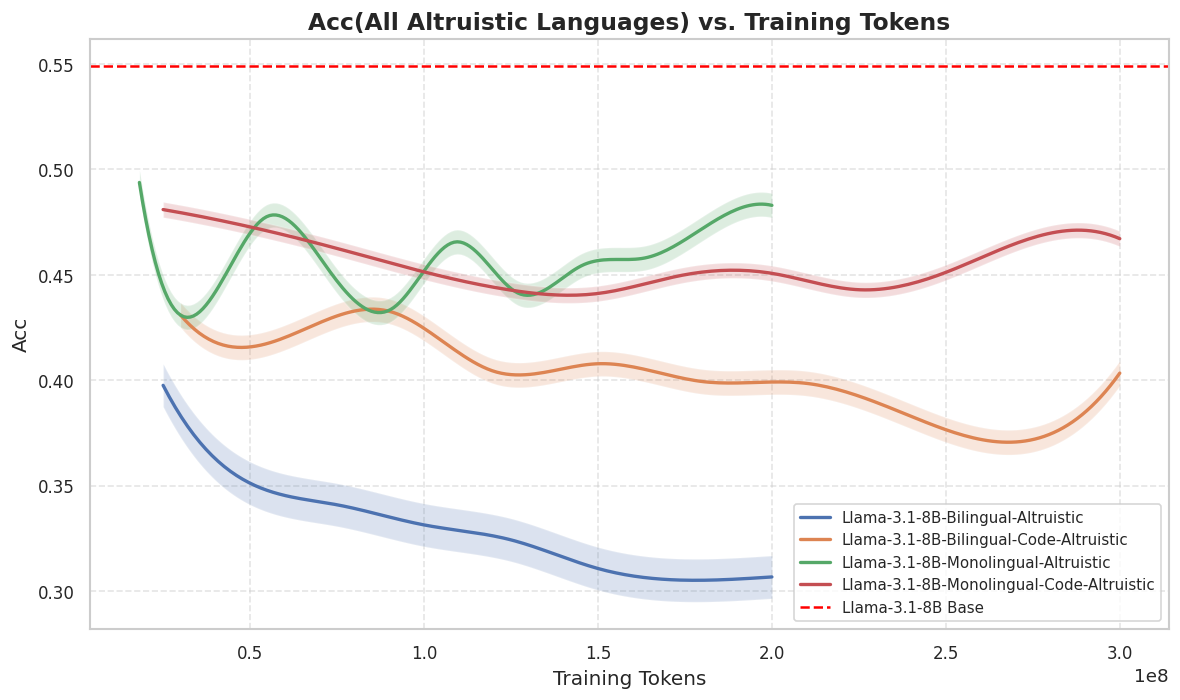

In [62]:
vis_smooth(df_all, "All Altruistic Languages", 0.549)

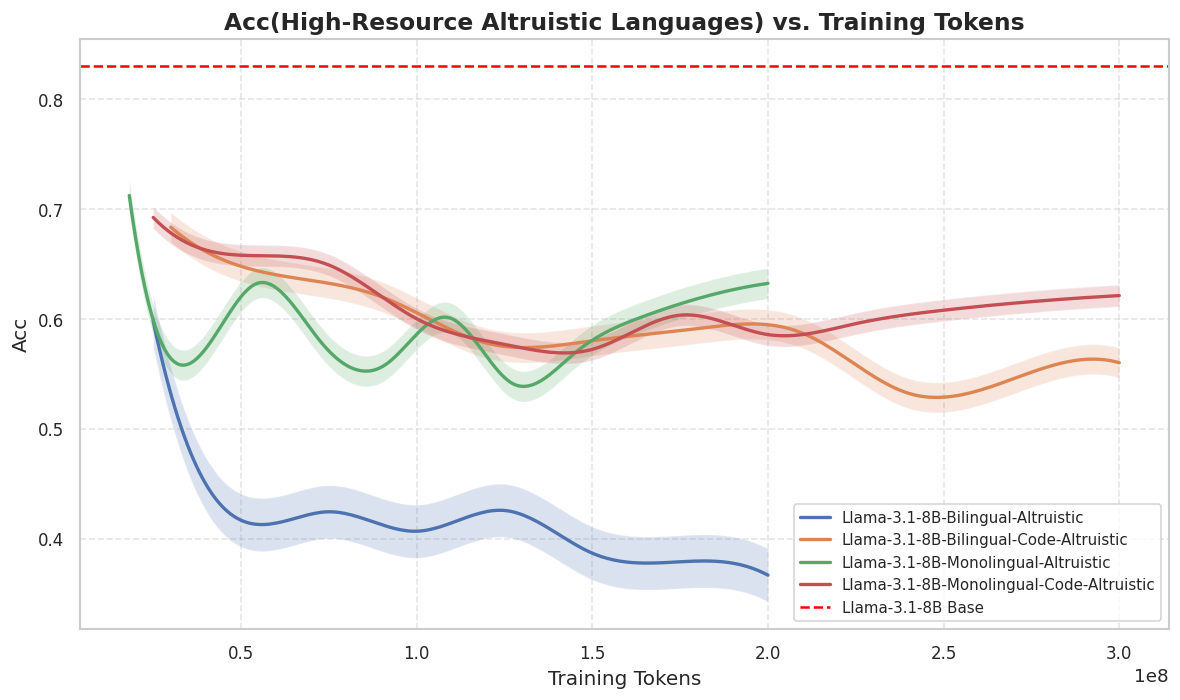

In [63]:
vis_smooth(df_high, "High-Resource Altruistic Languages", 0.830)

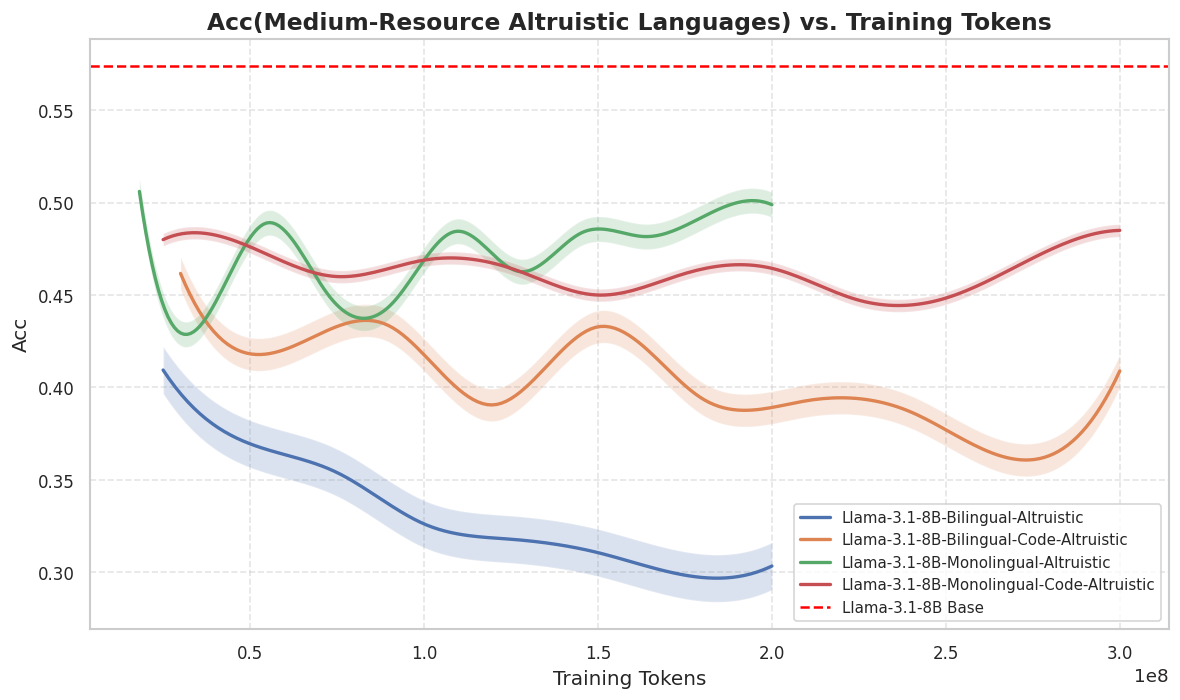

In [64]:
vis_smooth(df_medium, "Medium-Resource Altruistic Languages", 0.574)

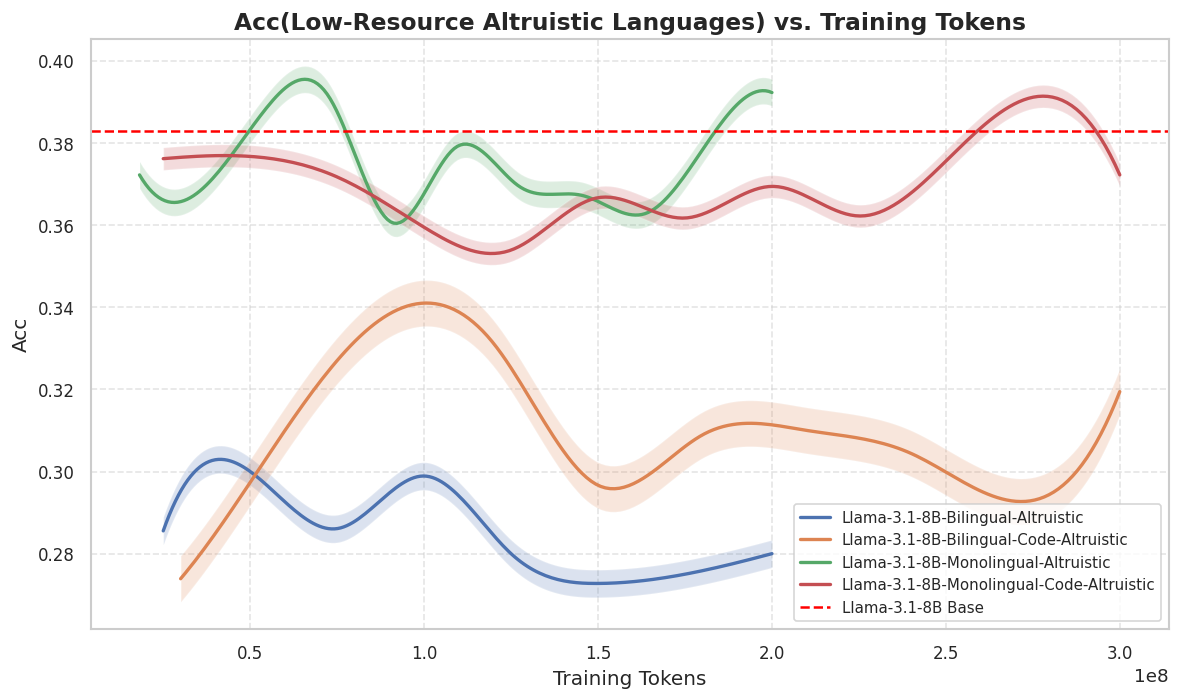

In [65]:
vis_smooth(df_low, "Low-Resource Altruistic Languages", 0.383)